<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Solving-the-Line-of-Best-Fit-by-Guessing" data-toc-modified-id="Solving-the-Line-of-Best-Fit-by-Guessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Solving the Line of Best Fit by Guessing</a></span></li><li><span><a href="#The-Loss-Function" data-toc-modified-id="The-Loss-Function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Loss Function</a></span></li><li><span><a href="#The-Cost-Function" data-toc-modified-id="The-Cost-Function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The Cost Function</a></span></li><li><span><a href="#Better-Way-of-Guessing:-Gradient-Descent" data-toc-modified-id="Better-Way-of-Guessing:-Gradient-Descent-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Better Way of Guessing: Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Gradient-Descent-in-Words" data-toc-modified-id="Gradient-Descent-in-Words-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Gradient Descent in Words</a></span></li><li><span><a href="#Stepping-Down-a-Hill:-Step-Size" data-toc-modified-id="Stepping-Down-a-Hill:-Step-Size-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Stepping Down a Hill: Step Size</a></span></li><li><span><a href="#Putting-It-All-Together" data-toc-modified-id="Putting-It-All-Together-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Putting It All Together</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Objectives

- Explain and use the concept of a gradient
- Explain the algorithm of gradient descent
- Describe the effect of the "learning rate" in the algorithm

# Solving the Line of Best Fit by Guessing

Let's say we have some data below: 

In [2]:
# Randomly created data in x & y
np.random.seed(27)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3 + 50 * x + y_randterm

Here's the data plotted out:

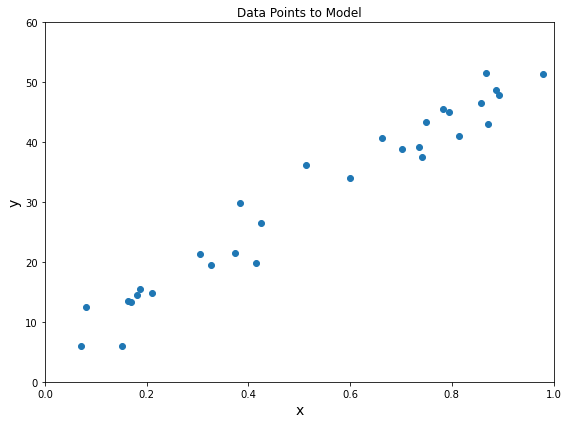

In [3]:
f, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, y)

ax.set_title('Data Points to Model')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_xlim(0,1)
ax.set_ylim(0,60)
plt.tight_layout()

If we wanted to make a best-fit line, what would you say it's about? Let's create a couple functions to make this easier to make a guess

In [4]:
# Plotting a guess of a regression line
def regression_formula(x, a, b):
    return a*x + b

def plot_data_and_guess(slope, intercept, ax, x1=x, x2=y, **kwargs):
    '''
    Plot our data and regression line on the given axis.

    Arguments:
        slope : float
            Value for the slope the regression line.
            
        intercept : float
            Value for the intercept the regression line.
        
        ax : Axes
            Axis to plot data and regression line
        
        x1 : array-like
            Values along the x-axis
        
        x2 : array-like
            Values along the y-axis
        
    Returns:
        fig : Figure

        ax : Axes
    '''
    # Plot data and regression line
    ax.scatter(x1, x2)
    yhat = regression_formula(x1, slope ,intercept)
    ax.plot(x1, yhat, 'r-', **kwargs)
    
    # Embelishments
    ax.set_title('Data Points to Model')
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.set_xlim(0,1)
    ax.set_ylim(0,60)

    return f, ax

So what do you think the regression parameters are?

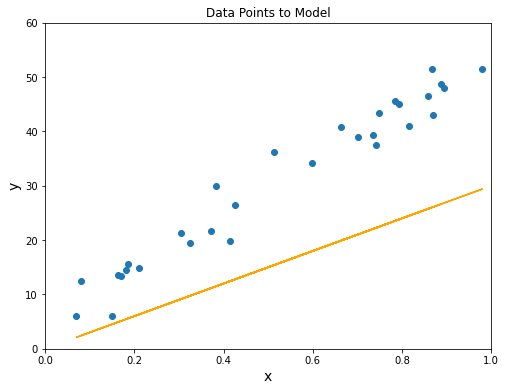

In [5]:
# Our guess
guess = {
    'slope': 30,
    'intercept': 0,
    'color':'orange'
}

f, ax = plt.subplots(figsize=(8,6))
plot_data_and_guess(**guess, ax=ax);

What would be your next guess be? 

- How can we tell when our guess is "better"?
- Could we formalize this?

# The Loss Function

One way we can know how well our guess or _model_ did is to compare the predicted values with the actual values. These are the _residuals_.

So this would give us the error for each data point:

$$ r_i = \hat{y}_i - y_i $$

In [6]:
def calculate_residuals(x_values, y_values, slope, intercept):
    '''Find the residulas for each data point'''
    yhat = intercept + slope*x_values
    errors = y_values - yhat
    return errors

This is great but we can go further by having just one number to represent how "bad" or "good" our model was to the real points.

This leads us to the **mean squared error** or **MSE**. This is all the residuals squared and then averaged:

$$ MSE = \frac{1}{n} \sum_{i}^{n} (\hat{y}_i - y_i)^2 $$

In [7]:
def mse(x_values, y_values, slope, intercept):
    
    resid_sq = calculate_residuals(x_values, y_values, slope, intercept)**2 

    return sum(resid_sq)

In [8]:
# Use our guess from earlier
slope = guess.get('slope', 30)
intercept = guess.get('intercept', 0)

mse(x,y,slope,intercept)

7863.4463895074105

> The function we use to find how bad our model did in prediction is typically called the **loss function**

What we found here is great! We can now compare different models with one another.

If we made a few different guesses, we could make our predictions and then calculate from the _loss function_ how good or bad our model did! We will want to find the _smallest loss_.

# The Cost Function

Now our model changes based on the different model _parameters_ (the coefficients $\beta_i$ for linear regression). 

If we imagine all the different ways we can adjust these parameters $\vec{\theta}$ and measure how well the model with the loss or **cost function** $J(\vec{\theta})$, we can plot this as a surface in this multidimensional plane. See the image below:

![](img/gradientdescent.png)

> Note that the terms **loss function** and **cost function** are frequently used interchangeably. Sometimes they are the same function, but sometimes they differ by making changes in the cost to improve _training_ or _learning_.

Let's try creating the cost function's curve/surface for just one parameter (slope) using our earlier data example:

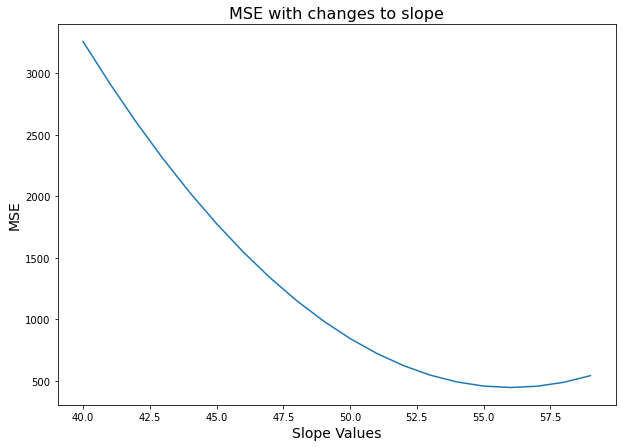

In [9]:
table = np.zeros((20,2))
# Find the MSE for different slope values
for idx, val in enumerate(range(40, 60)):
    table[idx,0] = val
    table[idx,1] = mse(x, y, slope=val, intercept=0)

plt.figure(figsize=(10,7))
plt.plot(table[:,0], table[:,1], '-')
plt.xlabel("Slope Values", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.title("MSE with changes to slope", fontsize=16);

Based on this graph, what is the optimal slope value?

How could we extend this to find the best slope _and_ intercept combination?

# Better Way of Guessing: Gradient Descent

So this probably all sounds great! We just need to find the minimum of the cost function!

But there's some bad news; we don't usually know what the cost function (which can be complicated!) "looks" like without trying a whole lot of different parameters $\vec{\theta}$. We'd need an _infinite_ number of parameter combinations to know $J(\vec{\theta})$ completely.

So what can we do?

Well, we can take one "guess" (set of  parameters) and then measure $J(\vec{\theta})$. Then we can adjust our guess/parameters in a "good" direction, "down the hill". This is the basic idea of gradient descent.

> **Gradient descent** is an optimization procedure that uses the _gradient_ (a generalized notion of a derivative) of the cost function.

So how do find this "better" guess? Well, we need to find the best direction to move "downhill" the fastest. We can do this with a generalization of the derivative called the **gradient**:

$$\begin{align}\\
    \large -\nabla J &= \sum_i \dfrac{\partial J}{\partial \theta_i} \\
            &= \frac{\partial J}{\partial \theta_1} +  \frac{\partial J}{\partial \theta_2} + \dots +  \frac{\partial J}{\partial \theta_n}
\end{align}$$

In the multivariate case, the gradient tells us how the function is changing **in each dimension**. A large value of the derivative with respect to a particular variable means that the gradient will have a large component in the corresponding direction. Therefore, **the gradient will point in the direction of steepest increase**.

![](img/gradientdescent.png)

## Gradient Descent in Words

- Make a guess at where the function attains its minimum value
- Calculate the gradient/derivative at that point
- Use that value to decide how to make your next guess!

Repeat until we get the derivative as close as we like to 0.

If we want to improve our guess at the minimum of our loss function, we'll move in the **opposite direction** of the gradient away from our last guess. Hence we are using the *gradient* of our loss function to *descend* to the minimum value of the relevant loss function.

## Stepping Down a Hill: Step Size

So we now have the basic idea of gradient descent of "going down a hill" and hopefully it's obvious that the steeper the hill, the more we can adjust our parameters to get to "bottom" (optimal parameters) faster.

But a big question is how big of a step do we take?

> The amount we adjust our parameter is determined by out **step size** or **learning rate** $\alpha$

If our steps are _too big_, we risk skipping over the minimum value (optimal parameters).

If our steps are _too small_, it might take us too long to reach the minimum value.

![learning_rate](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

Here's an elegant solution: Make the size of your step **proportional to the value of the derivative at the point where you currently are in parameter space**! If we're very far from the minimum, then our values will be large, and so we therefore can safely take a large step; if we're close to the minimum, then our values will be small, and so we should therefore take a smaller step.

I said the size of the step is proportional to the value of the derivative. The constant of proportionality is often called the **"learning rate"**. 

This page helps to explain the dangers of learning rates that are too large and too small: https://www.jeremyjordan.me/nn-learning-rate/.

> Note there are other optimizations we can do for gradient descent and rely on adjusting our cost function or how we take steps or both.

## Putting It All Together

The general algorithm looks like this:

We'll make a guess, $\vec{s}$, at where our loss function attains a minimum. If we're not happy with how close the value of the gradient there is to 0, then we'll make a new guess, and the new guess will be constructed as follows:

$\large\vec{s}_{new} = \vec{s}_{old} - \alpha\nabla f(\vec{s}_{old})$,

where $\alpha$ is the learning rate.

In the one-dimensional case, we'll have:

$\large x_{new} = x_{old} - \alpha\frac{df}{dx}|_{x_{old}}$.